In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [63]:
df = pd.read_csv("/Users/admin/PycharmProjects/pythonProject1/data/medical_insurance.csv")

In [64]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
mapping = {'no': 0, 'yes': 1}
df['smoker'] = df['smoker'].map(mapping)

In [66]:
df['sex'] = df['sex'].map({"female": 0, "male": 1})

In [67]:
df['region'] = df['region'].map({'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest': 3})

In [68]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [69]:
y = df['charges']
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [70]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64

In [71]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,2
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
2767,47,0,45.320,1,0,1
2768,21,0,34.600,0,0,2
2769,19,1,26.030,1,1,3
2770,23,1,18.715,0,0,3


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
def predict(weight, X_train, bias):
    y_hat = X_train @ weight + bias
    return y_hat

In [84]:
def compute_loss(y_train, y_hat):
    return (y_hat - y_train) ** 2

In [85]:
def gradient_descent(y_train, y_hat):
    return 2 * (y_hat - y_train)

In [96]:
# Define hyperparameters
learning_rate = 0.001
epochs = 1000

# Initialize weights and bias
weight = np.random.randn(X_train.shape[1])
bias = np.random.rand()

# Lists to store loss values
train_losses = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    y_pred = predict(weight, X_train, bias)

    # Compute loss
    losses = compute_loss(y_train, y_pred)
    mean_loss = np.mean(losses)
    train_losses.append(mean_loss)

    # Compute gradients
    grad = gradient_descent(y_train, y_pred)

    # Update weights
    weight = weight - learning_rate * (X_train.T @ grad) / len(y_train)
    bias = bias - learning_rate * np.mean(grad)

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {mean_loss:.4f}")

Epoch 0: Loss = 324857507.5179
Epoch 100: Loss = 229512363.0880
Epoch 200: Loss = 165752980.6604
Epoch 300: Loss = 123083939.1435
Epoch 400: Loss = 94508026.7902
Epoch 500: Loss = 75356608.4784
Epoch 600: Loss = 62512303.2153
Epoch 700: Loss = 53891963.1634
Epoch 800: Loss = 48102509.2697
Epoch 900: Loss = 44211649.2525


In [97]:
y_test_predict = predict(weight, X_test, bias)
test_loss = np.mean(compute_loss(y_test, y_test_predict))
print(f"Test Loss: {test_loss}")

Test Loss: 47251349.00688879


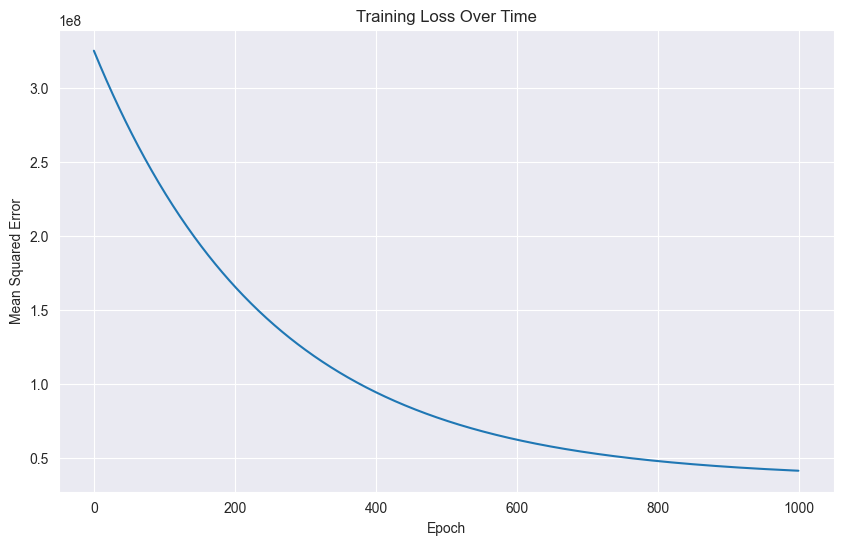

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()

In [101]:
from sklearn.metrics import r2_score

y_train_pred = predict(weight, X_train, bias)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_predict)

print(f"Train R² score: {train_r2:.4f}")
print(f"Test R² score: {test_r2:.4f}")

Train R² score: 0.7153
Test R² score: 0.6921


In [102]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)
linreg.score(X_test, y_test)

0.7387449109641269

Custom model weights: [3026.5065003   198.97598781 1730.1181232   526.75380423 8328.56521837
 -240.58301517]
Custom model bias: 11565.13215454184
scikit-learn coefficients: [3562.24318174  -32.40745803 1871.08402878  552.32896296 9696.82025318
 -122.16109042]
scikit-learn intercept: 13371.074048190349


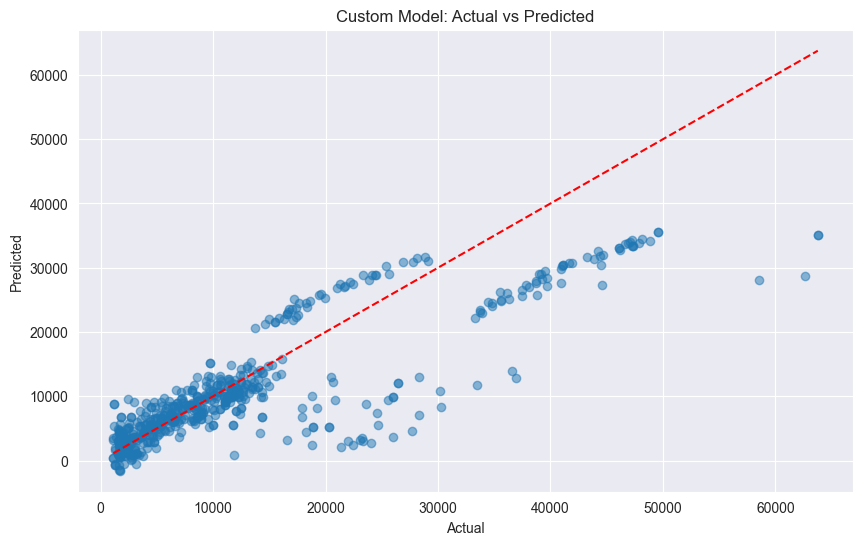

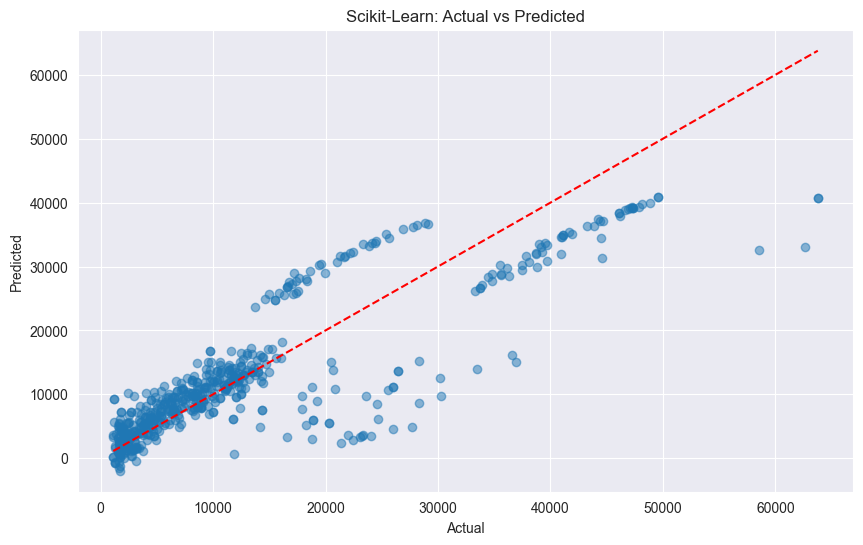

In [103]:
# Print custom model weights
print("Custom model weights:", weight)
print("Custom model bias:", bias)

# Compare with scikit-learn coefficients
print("scikit-learn coefficients:", linreg.coef_)
print("scikit-learn intercept:", linreg.intercept_)

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_predict, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Custom Model: Actual vs Predicted')
plt.show()

# Do the same for scikit-learn
y_test_predict_sklearn = linreg.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_predict_sklearn, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scikit-Learn: Actual vs Predicted')
plt.show()